In [1]:
pip install https://github.com/PatrickKudo/flappy-bird-gymnasium/archive/refs/heads/main.zip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 62.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages and initialize environment
import os
import random
import time
from itertools import count
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import get_backend
import numpy as np
import torch
import pygame
import gymnasium
import flappy_bird_gymnasium

# set up matplotlib display functionality
is_ipython = 'inline' in get_backend()

os.environ["SDL_VIDEODRIVER"] = "dummy"
os.environ["SDL_AUDIODRIVER"] = "dummy"

env = gymnasium.make(
    "FlappyBird-v0", audio_on=False, render_mode="rgb_array", use_lidar=False
)

plt.ion()

pygame 2.5.2 (SDL 2.28.2, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Check if GPU is available to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


### Demonstrate policy of doing nothing (action = 0):

Total Steps = 31
Final Score = 0


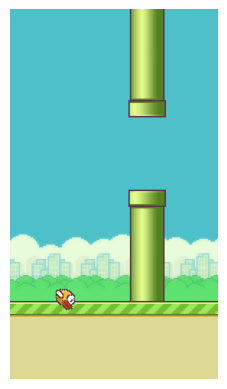

In [4]:
steps = 0
obs = env.reset()
pygame.init()

while True:
    # Getting action:
    action = 0
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
        if event.type == pygame.KEYDOWN and (
            event.key == pygame.K_SPACE or event.key == pygame.K_UP
        ):
            action = 1

    # Processing:
    obs, _, done, _, info = env.step(action)

    # Get the RGB image of the game screen:
    rgb_image = env.render()

    steps += 1
    print(
        f"Action: {action}\n"
        f"Score: {info['score']}\n Steps: {steps}\n"
    )

    # Display the game screen:
    plt.imshow(rgb_image)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.01)

    if done:
        break

env.close()

# Final results:
print('Total Steps = ' + str(steps))
print('Final Score = ' + str(info['score']))

### This demonstrates the manual way of applying the action of 0 (do nothing) with each step:

In [5]:
obs = env.reset()
env.step(0) #1
env.step(0) #2
env.step(0) #3
env.step(0) #4
env.step(0) #5
env.step(0) #6
env.step(0) #7
env.step(0) #8
env.step(0) #9
env.step(0) #10
env.step(0) #11
env.step(0) #12
env.step(0) 
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(0) #29
env.step(0) #30

(array([ 0.58333333,  0.25390625,  0.44921875,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.72851562,
         1.        , -0.5       ]),
 0.1,
 False,
 False,
 {'score': 0})

### At step 31, the game will be over as the Flappy Bird falls to the ground (note reward = -1):

In [6]:
env.step(0) #31

(array([ 0.56944444,  0.25390625,  0.44921875,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.743125  ,
         1.        , -0.53333333]),
 -1,
 True,
 False,
 {'score': 0})

### Demonstrate random agent policy:

Seed # 4023
Total Steps = 50
Final Score = 0


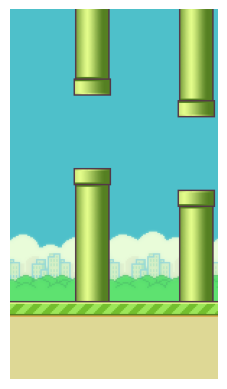

In [7]:
# Set random seed
random_seed = random.randint(0,9999)
random.seed(random_seed)

steps = 0
obs = env.reset()
pygame.init()

while True:
    # Pick action at random:
    action = random.randint(0, 1)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
        if event.type == pygame.KEYDOWN and (
            event.key == pygame.K_SPACE or event.key == pygame.K_UP
        ):
            action = 1

    # Processing:
    obs, _, done, _, info = env.step(action)

    # Get the RGB image of the game screen:
    rgb_image = env.render()

    steps += 1
    print(
        f"Action: {action}\n"
        f"Score: {info['score']}\n Steps: {steps}\n"
    )

    # Display the game screen:
    plt.imshow(rgb_image)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.01)

    if done:
        break

env.close()

# Final results:
print('Seed # ' + str(random_seed))
print('Total Steps = ' + str(steps))
print('Final Score = ' + str(info['score']))

In [8]:
# Plotting function


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Simulating...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display(plt.gcf())
            clear_output(wait=True)
        else:
            display(plt.gcf())
            
            

### Simulate random agent games 10,000 times:

Random seed #6030
Complete


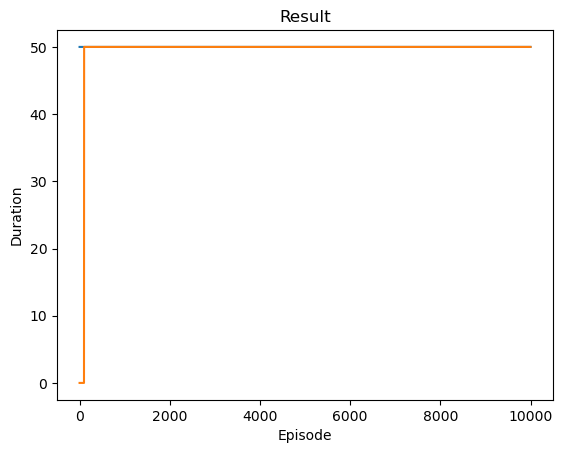

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# Set random seed
random_seed = random.randint(0,9999)
random.seed(random_seed)
# Initialize simulation parameters
num_episodes = 10000
episode_durations = []

# Start loop
for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()

    for t in count():
        action = random.randint(0, 1)

        # Processing:
        observation, reward, terminated, truncated, _ = env.step(action)
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated
        
        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Move to the next state
        state = next_state

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Random seed #' + str(random_seed))
print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

Did we need to do that 10,000 times? Maybe not, but now you won't have to.